In [1]:
import numpy as np
import matplotlib.pyplot as plt
from simple_GAN.gan import GAN
from simple_GAN.utils import sample_data, relu, sigmoid, tanh, DataChunk

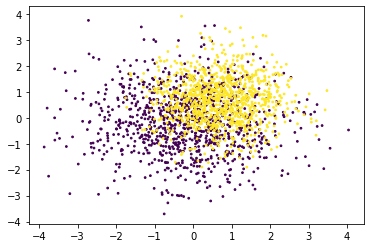

In [2]:
data, labels = sample_data(1000, 2)
plt.scatter(data[:, 0], data[:, 1], c=labels, s=3)
plt.show()

In [3]:
max_value = np.max(np.abs(data))
max_value

4.036139718580795

In [4]:
normed_data = data / max_value

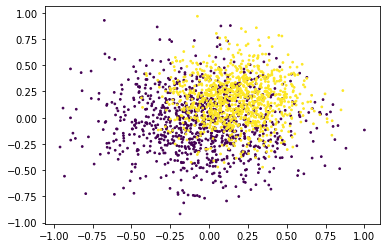

In [5]:
plt.scatter(normed_data[:, 0], normed_data[:, 1], c=labels, s=3)
plt.show()

In [6]:
chunk = DataChunk(normed_data, labels)
net = GAN(batch_size=128)

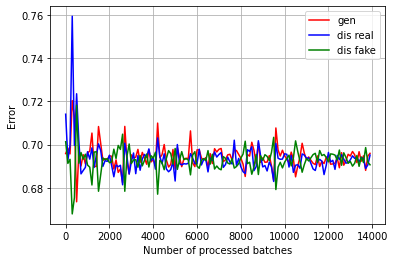

In [7]:
net.train(chunk, epochs=1000, 1e-4)

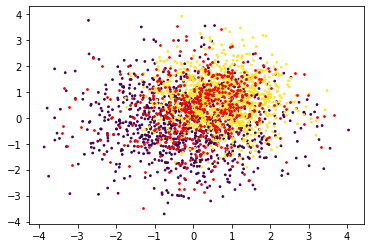

In [20]:
plt.scatter(data[:, 0], data[:, 1], c=labels, s=3)
for i in range(4):
    noise = np.random.uniform(-1, 1, [net.batch_size, 100]).astype(np.float32)
    gen_output = net.generate(noise) * max_value
    plt.scatter(gen_output[:, 0], gen_output[:, 1], c='r', s=3)
plt.show()

In [15]:
fake_probs = net.discriminator.infer(gen_output[:16]/max_value)
fake_probs

array([[0.49345569],
       [0.50607325],
       [0.50299345],
       [0.49288311],
       [0.49283281],
       [0.4902412 ],
       [0.5078677 ],
       [0.49927834],
       [0.50177972],
       [0.50503179],
       [0.49638389],
       [0.50311078],
       [0.50294977],
       [0.49388108],
       [0.49104411],
       [0.49449329]])

In [10]:
np.mean(fake_probs)

0.49849222705824775

In [11]:
net.generator_loss(fake_probs)

0.6962284402720518

In [12]:
batch, _ = next(chunk.iter_batches(net.batch_size))
real_probs = net.discriminator.infer(batch[:16])
real_probs

array([[0.50554505],
       [0.50134843],
       [0.50178125],
       [0.49638391],
       [0.49634379],
       [0.5001671 ],
       [0.51576668],
       [0.49542596],
       [0.50070273],
       [0.49684142],
       [0.49937615],
       [0.49475933],
       [0.49679273],
       [0.49849588],
       [0.49221599],
       [0.49618202]])

In [13]:
np.mean(real_probs)

0.49925802683937204